# Análisis Exploratorio de Datos

**Trabajo Fin de Máster**

**Sistema de predicción para prevenir la congestión en mostradores de facturación en aeropuertos**

Autor: David Cortés Alvarez

Máster en Inteligencia Artificial

## Librerías

In [1]:
# Tratamiento de Datos
# -----------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import qgrid

In [2]:
# Gráficos
# -----------------------------------------------------------------------------------
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [3]:
# Modelos
# -----------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.tree import export_graphviz

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.7.0


In [4]:
# Varios
# -----------------------------------------------------------------------------------
import random
import time
from math import sqrt

## Carga de Datos

Parámetros de entrada:

In [5]:
# Parámetros de entrada
Escalas_Seleccionadas = ['LPA', 'ACE', 'FUE', 'TFN', 'TFS', 'SPC', 'VDE','GMZ']
# Ruta de dataset a cargar
histModelo = "TFM_FileIN_Dataset_Training.csv"

Carga del Dataset: 

In [6]:
data = pd.read_csv(histModelo, header=0)

## Análisis Exploratorio

In [7]:
# Visualizamos los 5 primeros registros
print(data.head(5))

                  ID_VUELO  APD  APA       SEGMENTO CIA VUELO  \
0  NT0650D01M02Y2019GMZTFN  GMZ  TFN   Interinsular  NT  0650   
1  NT0110D01M02Y2019TFNLPA  TFN  LPA   Interinsular  NT  0110   
2  NT6651D01M02Y2019TFNVDE  TFN  VDE   Interinsular  NT  6651   
3  NT6307D01M02Y2019AGALPA  AGA  LPA  Internacional  NT  6307   
4  NT0421D01M02Y2019FUETFN  FUE  TFN   Interinsular  NT  0421   

                           FLOTA PROPIETARIO_VUELO    FECHA_SALIDA_PROG  ANIO  \
0       ATR72-BINTER CANARIAS-72   BINTER CANARIAS  01/02/2019 10:30:00  2019   
1       ATR72-BINTER CANARIAS-72   BINTER CANARIAS  01/02/2019 11:30:00  2019   
2  ATR72-600-CANARIAS AIRLINE-72  CANARIAS AIRLINE  01/02/2019 11:40:00  2019   
3   ATR72-600-BINTER CANARIAS-72   BINTER CANARIAS  01/02/2019 14:15:00  2019   
4  ATR72-600-CANARIAS AIRLINE-72  CANARIAS AIRLINE  01/02/2019 16:35:00  2019   

   ...   PAX  OCUPACION     SECTOR  CMAX  PAX_V PAX_M A180 A120  A60  A0  
0  ...  35.0       49.0   Canarias  72.0   35.0

In [8]:
print('Númmero de Filas y columnas:',data.shape)
print('Columnas:',data.columns)

Númmero de Filas y columnas: (168156, 29)
Columnas: Index(['ID_VUELO', 'APD', 'APA', 'SEGMENTO', 'CIA', 'VUELO', 'FLOTA',
       'PROPIETARIO_VUELO', 'FECHA_SALIDA_PROG', 'ANIO', 'MES', 'DIA',
       'DIA_SEMANA', 'HORA', 'FESTIVO', 'MATR', 'FRANJA_HORARIA', 'OPERADOR',
       'OFERTA', 'PAX', 'OCUPACION', 'SECTOR', 'CMAX', 'PAX_V', 'PAX_M',
       'A180', 'A120', 'A60', 'A0'],
      dtype='object')


In [9]:
# Verificamos la estructura del DataSet
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168156 entries, 0 to 168155
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID_VUELO           168156 non-null  object 
 1   APD                168156 non-null  object 
 2   APA                168156 non-null  object 
 3   SEGMENTO           168156 non-null  object 
 4   CIA                168156 non-null  object 
 5   VUELO              168156 non-null  object 
 6   FLOTA              168156 non-null  object 
 7   PROPIETARIO_VUELO  168156 non-null  object 
 8   FECHA_SALIDA_PROG  168156 non-null  object 
 9   ANIO               168156 non-null  int64  
 10  MES                168156 non-null  int64  
 11  DIA                168156 non-null  int64  
 12  DIA_SEMANA         168156 non-null  int64  
 13  HORA               168156 non-null  object 
 14  FESTIVO            168156 non-null  int64  
 15  MATR               168156 non-null  object 
 16  FR

In [10]:
# Hacemos un ajuste de tipo
data['VUELO'] = data['VUELO'].astype('str')

In [11]:
# Analizamos cada elemento y sus valores
for column in data:
    unique_vals =np.unique(data[column])
    nr_values = len(unique_vals)
    if nr_values < 20:
        print ('The number of values for feature {}:{} -- {}'.format(column, nr_values, unique_vals))
    else:
        print ('The number of values for feature {}:{}'.format(column, nr_values))

The number of values for feature ID_VUELO:168156
The number of values for feature APD:49
The number of values for feature APA:43
The number of values for feature SEGMENTO:4 -- ['Domestico' 'Interinsular' 'Internacional' 'Schengen']
The number of values for feature CIA:1 -- ['NT']
The number of values for feature VUELO:1011
The number of values for feature FLOTA:7 -- ['ATR72-600-BINTER CANARIAS-72' 'ATR72-600-CANARIAS AIRLINE-72'
 'ATR72-BINTER CANARIAS-72' 'ATR72-CANARYFLY-72' 'CRJ1000-MEDOPS-100'
 'Desconocido' 'EMBRAER E195-E2-BINTER CANARIAS-132']
The number of values for feature PROPIETARIO_VUELO:5 -- ['BINTER CANARIAS' 'CANARIAS AIRLINE' 'Desconocido' 'MEDOPS' 'NAYSA']
The number of values for feature FECHA_SALIDA_PROG:82395
The number of values for feature ANIO:3 -- [2019 2020 2021]
The number of values for feature MES:12 -- [ 1  2  3  4  5  6  7  8  9 10 11 12]
The number of values for feature DIA:31
The number of values for feature DIA_SEMANA:7 -- [1 2 3 4 5 6 7]
The number of 

In [12]:
# Realizamos un descripción estadística
data[['OFERTA','PAX','OCUPACION','CMAX','PAX_V','PAX_M','A180','A120','A60','A0']].describe()

,OFERTA,PAX,OCUPACION,CMAX,PAX_V,PAX_M,A180,A120,A60,A0
count,168156.000000,165400.000000,167211.000000,168124.000000,164266.000000,154828.000000,168156.000000,168156.000000,168156.000000,168156.000000
mean,73.393171,54.298446,72.520384,75.520949,53.747081,29.157252,8.072974,5.829218,8.631687,3.762435
std,15.420787,19.523835,25.753378,12.588881,19.225608,13.557986,9.456937,6.997971,7.525857,6.682983
min,0.000000,0.000000,0.000000,72.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,41.000000,56.000000,72.000000,40.000000,19.000000,1.000000,0.000000,3.000000,0.000000
50%,72.000000,59.000000,80.000000,72.000000,58.000000,29.000000,5.000000,4.000000,7.000000,0.000000
75%,72.000000,69.000000,94.000000,72.000000,68.000000,38.000000,12.000000,9.000000,12.000000,5.000000
max,136.000000,132.000000,144.000000,132.000000,132.000000,131.000000,96.000000,95.000000,95.000000,69.000000


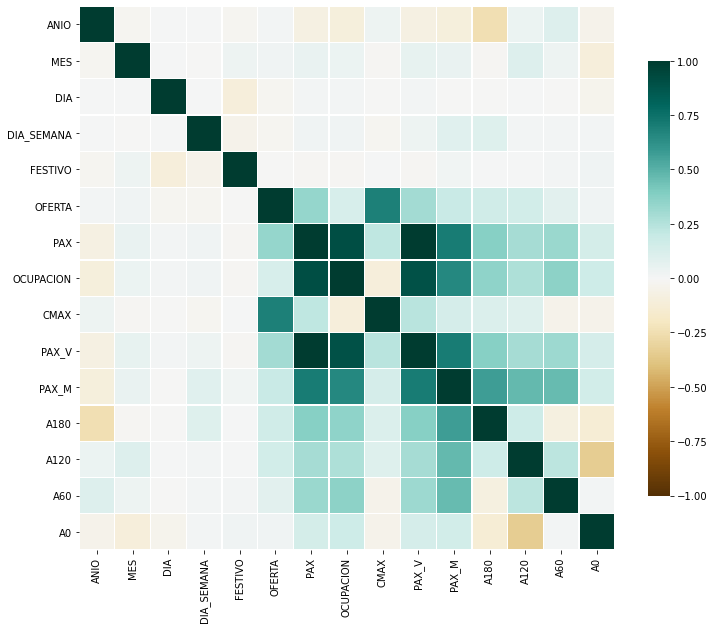

In [13]:
# Matrix de correlación
heatmap = data.corr()
plt.figure(figsize=(12, 10))
g = sns.heatmap(heatmap, cmap="BrBG", vmin= -1, vmax=1,
           linewidth=0.3, cbar_kws={"shrink": .8})

### Estudio de datos (Gráficos)

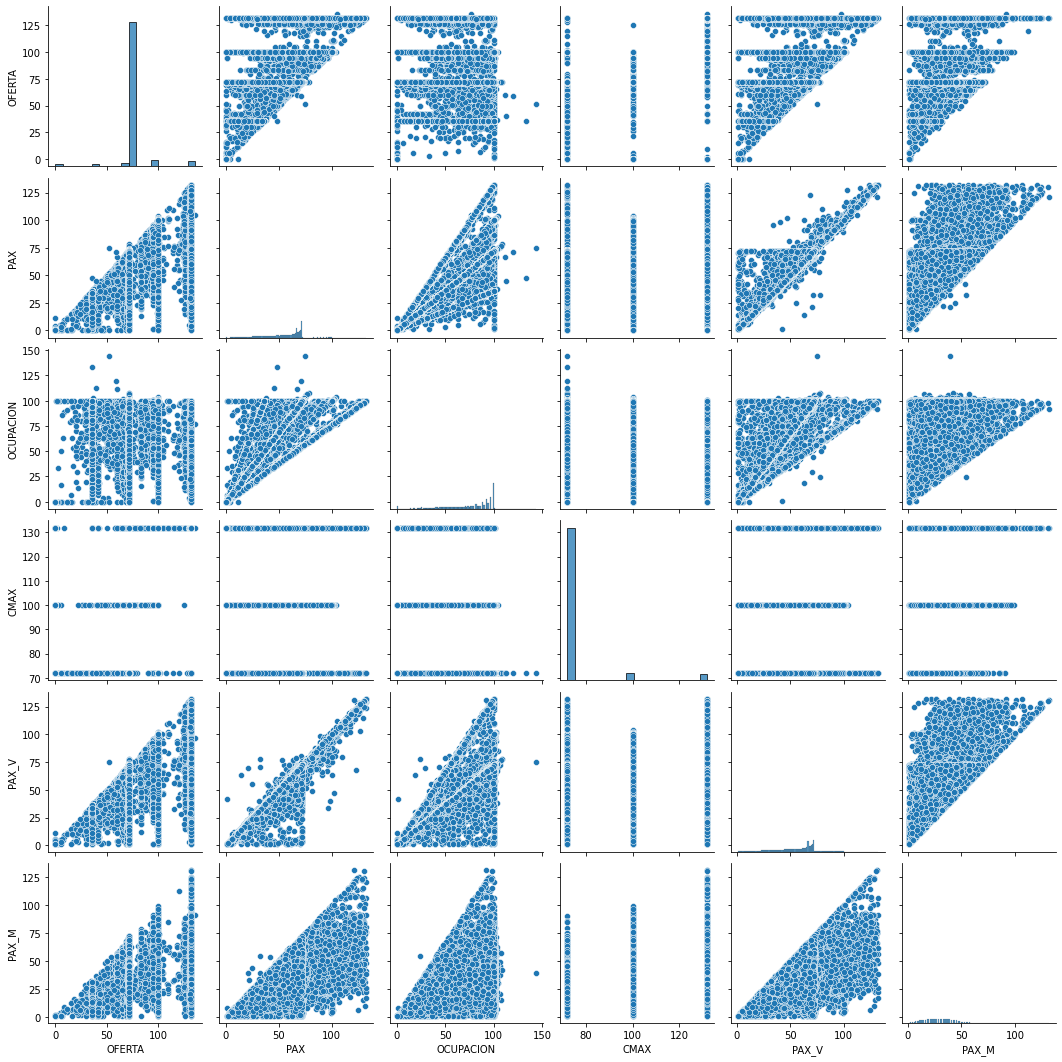

In [14]:
# Visualizamos los datos con la librería Seaborn
data_show = data[['OFERTA','PAX','OCUPACION','CMAX','PAX_V','PAX_M']]

g = sns.pairplot(data_show)

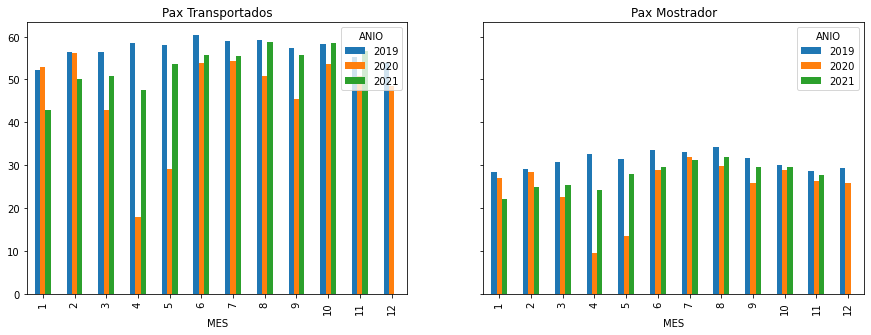

In [15]:
df_pivot_1 = pd.pivot_table(data,values="PAX",index="MES",columns="ANIO",aggfunc=np.mean)
df_pivot_2 = pd.pivot_table(data,values="PAX_M",index="MES",columns="ANIO",aggfunc=np.mean)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)
df_pivot_1.plot(ax=axes[0],kind="bar", title="Pax Transportados")
df_pivot_2.plot(ax=axes[1],kind="bar", title="Pax Mostrador")

plt.show()

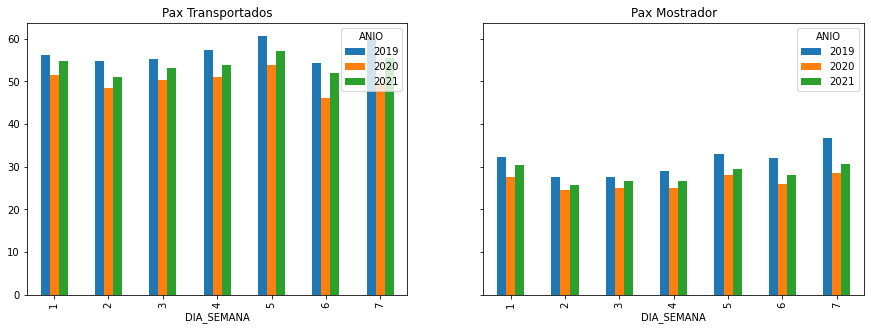

In [16]:
df_pivot_1 = pd.pivot_table(data,values="PAX",index="DIA_SEMANA",columns="ANIO",aggfunc=np.mean)
df_pivot_2 = pd.pivot_table(data,values="PAX_M",index="DIA_SEMANA",columns="ANIO",aggfunc=np.mean)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)
df_pivot_1.plot(ax=axes[0],kind="bar", title="Pax Transportados")
df_pivot_2.plot(ax=axes[1],kind="bar", title="Pax Mostrador")

plt.show()

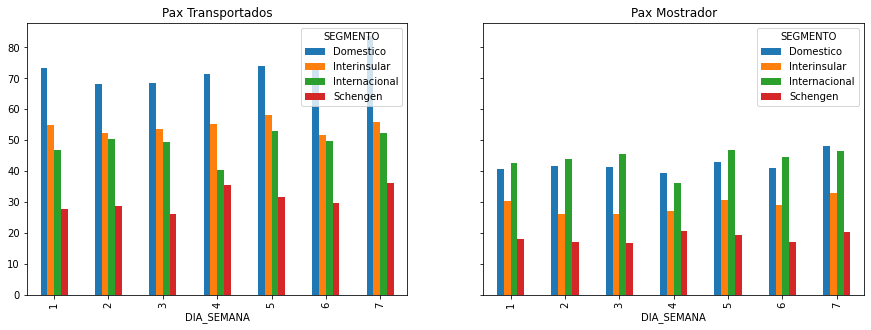

In [17]:
df_pivot_1 = pd.pivot_table(data,values="PAX",index="DIA_SEMANA",columns="SEGMENTO",aggfunc=np.mean)
df_pivot_2 = pd.pivot_table(data,values="PAX_M",index="DIA_SEMANA",columns="SEGMENTO",aggfunc=np.mean)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)
df_pivot_1.plot(ax=axes[0],kind="bar", title="Pax Transportados")
df_pivot_2.plot(ax=axes[1],kind="bar", title="Pax Mostrador")

plt.show()

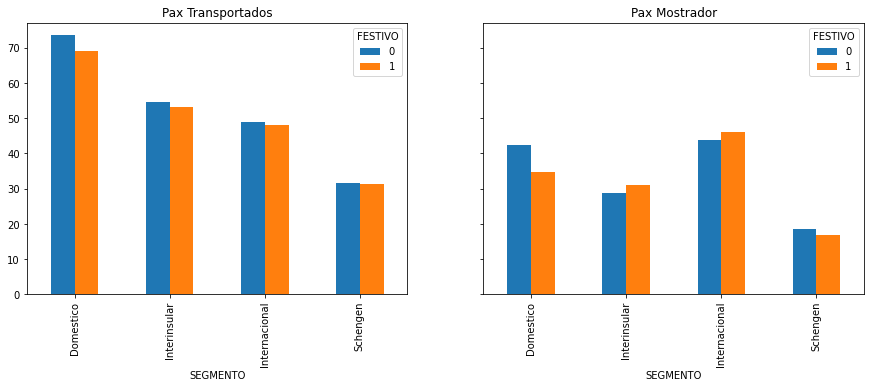

In [18]:
df_pivot_1 = pd.pivot_table(data,values="PAX",index="SEGMENTO",columns="FESTIVO",aggfunc=np.mean)
df_pivot_2 = pd.pivot_table(data,values="PAX_M",index="SEGMENTO",columns="FESTIVO",aggfunc=np.mean)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)
df_pivot_1.plot(ax=axes[0],kind="bar", title="Pax Transportados")
df_pivot_2.plot(ax=axes[1],kind="bar", title="Pax Mostrador")

plt.show()

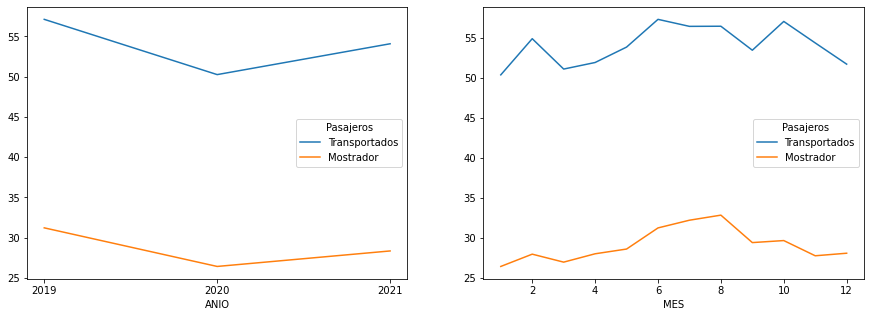

In [19]:
df_pivot_1 = pd.pivot_table(data,values="PAX",index="ANIO",aggfunc=np.mean)
df_pivot_2 = pd.pivot_table(data,values="PAX_M",index="ANIO",aggfunc=np.mean)
df_pivot_3 = pd.pivot_table(data,values="PAX",index="MES",aggfunc=np.mean)
df_pivot_4 = pd.pivot_table(data,values="PAX_M",index="MES",aggfunc=np.mean)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
df_pivot_1.plot(ax=axes[0])
df_pivot_2.plot(ax=axes[0])
df_pivot_3.plot(ax=axes[1])
df_pivot_4.plot(ax=axes[1])
axes[0].legend(['Transportados','Mostrador'], title = "Pasajeros")
axes[1].legend(['Transportados','Mostrador'], title = "Pasajeros")

axes[0].xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

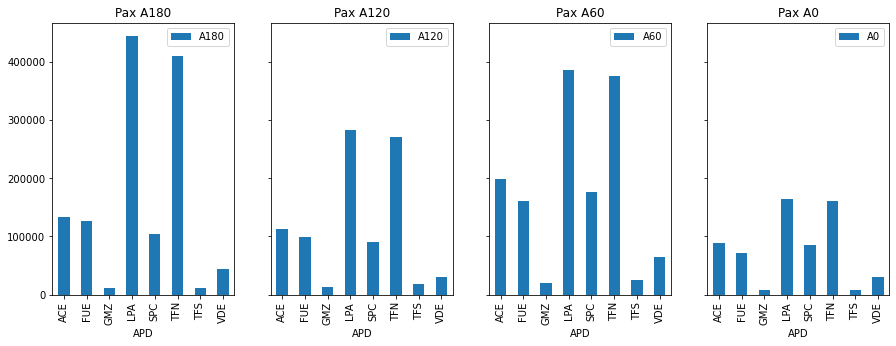

In [20]:
data_show = data[data['APD'].isin(Escalas_Seleccionadas)]

dfp_A180 = pd.pivot_table(data_show,values="A180",index="APD",aggfunc=np.sum)
dfp_A120 = pd.pivot_table(data_show,values="A120",index="APD",aggfunc=np.sum)
dfp_A60 = pd.pivot_table(data_show,values="A60",index="APD",aggfunc=np.sum)
dfp_A0 = pd.pivot_table(data_show,values="A0",index="APD",aggfunc=np.sum)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,5), sharey=True)
dfp_A180.plot(ax=axes[0],title="Pax A180",kind="bar")
dfp_A120.plot(ax=axes[1],title="Pax A120",kind="bar")
dfp_A60.plot(ax=axes[2],title="Pax A60",kind="bar")
dfp_A0.plot(ax=axes[3],title="Pax A0",kind="bar")

plt.show()

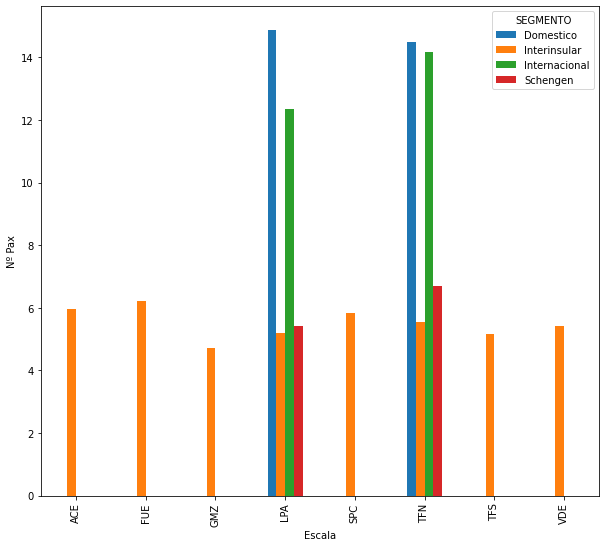

In [21]:
df_pivot = pd.pivot_table(data_show,values="A120",index="APD",columns="SEGMENTO",aggfunc=np.mean)
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(10, 9)
ax.set_xlabel("Escala")
ax.set_ylabel("Nº Pax")
plt.show()

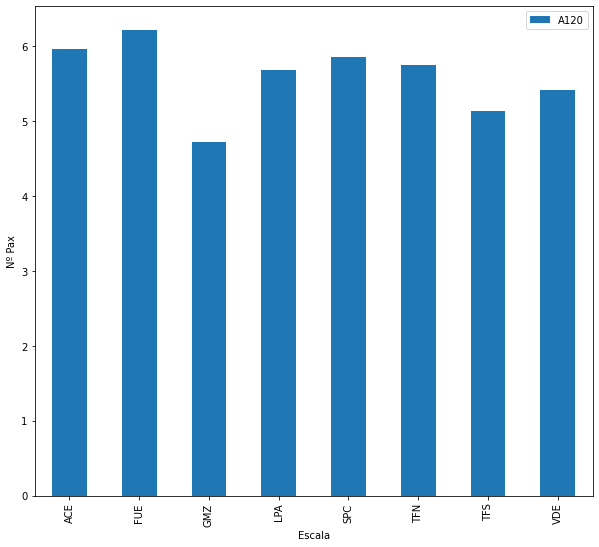

In [22]:
df_pivot = pd.pivot_table(data_show,values="A120",index="APD",aggfunc=np.mean)
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(10, 9)
ax.set_xlabel("Escala")
ax.set_ylabel("Nº Pax")
plt.show()

## Data Pre-Processing 
En esta sección se realizará un Análisis Exploratorio de los Datos para verificar si es necesario el tratamiento de NULOS, Datos Erróneos, Outliers y confirmar la relación correcta entre ellos. Técnicas posibles a utilizar: 
- Data Cleansing & Data Aggregation
- Joins
- Normalize & Scale 
- Convert categorical features into numeric representation
- Feature Selection
- Feature Engineering

### Data Cleaning & Data Aggregation 

In [23]:
# Eliminamos aquellos registros que no son de los aeropuertos a tratar
data = data[data.APD.isin(Escalas_Seleccionadas)]

In [24]:
data.shape

(159282, 29)

In [25]:
# Eliminamos los que no tienen ocupación
data = data[(data['OFERTA'] > 0) & (data['OCUPACION'] > 0)]

In [26]:
data.shape

(155929, 29)

In [27]:
# Quitamos los 0 de la izquierda al identificador de vuelo
data['VUELO'] = data['VUELO'].str.replace(r'^(0+)(?!$)', '', regex=True).fillna('0')
data['VUELO'] = data['VUELO'].astype(int)

In [28]:
# Modificamos la columna de Hora para transformarla a minutos del día
data.insert(9, 'SALIDA_MINUTOS_DIA', 
            data.HORA.astype(str).apply(lambda x: x.split(':')).apply(lambda x: int(x[0]) * 60 + int(x[1])))

# Borramos el campo HORA al tener en nuevo campo SALIDA_MINUTOS_DIA
data = data.drop(columns=['HORA'])

In [29]:
data.shape

(155929, 29)

In [30]:
data.head(10)

,ID_VUELO,APD,APA,SEGMENTO,CIA,VUELO,FLOTA,PROPIETARIO_VUELO,FECHA_SALIDA_PROG,SALIDA_MINUTOS_DIA,...,PAX,OCUPACION,SECTOR,CMAX,PAX_V,PAX_M,A180,A120,A60,A0
0,NT0650D01M02Y2019GMZTFN,GMZ,TFN,Interinsular,NT,650,ATR72-BINTER CANARIAS-72,BINTER CANARIAS,01/02/2019 10:30:00,630,...,35.0,49.0,Canarias,72.0,35.0,25.0,10,0,5,10
1,NT0110D01M02Y2019TFNLPA,TFN,LPA,Interinsular,NT,110,ATR72-BINTER CANARIAS-72,BINTER CANARIAS,01/02/2019 11:30:00,690,...,65.0,90.0,Canarias,72.0,64.0,36.0,6,2,18,6
2,NT6651D01M02Y2019TFNVDE,TFN,VDE,Interinsular,NT,6651,ATR72-600-CANARIAS AIRLINE-72,CANARIAS AIRLINE,01/02/2019 11:40:00,700,...,66.0,92.0,Canarias,72.0,66.0,49.0,19,1,14,15
4,NT0421D01M02Y2019FUETFN,FUE,TFN,Interinsular,NT,421,ATR72-600-CANARIAS AIRLINE-72,CANARIAS AIRLINE,01/02/2019 16:35:00,995,...,71.0,99.0,Canarias,72.0,69.0,32.0,17,0,4,11
5,NT0171D01M02Y2019LPATFN,LPA,TFN,Interinsular,NT,171,ATR72-600-CANARIAS AIRLINE-72,CANARIAS AIRLINE,01/02/2019 16:30:00,990,...,64.0,89.0,Canarias,72.0,63.0,32.0,8,3,10,10
6,NT0525D01M02Y2019ACELPA,ACE,LPA,Interinsular,NT,525,ATR72-BINTER CANARIAS-72,BINTER CANARIAS,01/02/2019 18:15:00,1095,...,68.0,94.0,Canarias,72.0,68.0,30.0,7,2,10,11
7,NT0637D01M02Y2019TFNSPC,TFN,SPC,Interinsular,NT,637,ATR72-600-CANARIAS AIRLINE-72,CANARIAS AIRLINE,01/02/2019 18:00:00,1080,...,72.0,100.0,Canarias,72.0,70.0,45.0,15,4,12,12
8,NT0611D05M02Y2019TFNSPC,TFN,SPC,Interinsular,NT,611,ATR72-600-CANARIAS AIRLINE-72,CANARIAS AIRLINE,05/02/2019 09:00:00,540,...,58.0,81.0,Canarias,72.0,58.0,9.0,0,0,1,8
9,NT0119D05M02Y2019LPATFN,LPA,TFN,Interinsular,NT,119,CRJ1000-MEDOPS-100,MEDOPS,05/02/2019 09:00:00,540,...,101.0,101.0,Canarias,100.0,99.0,17.0,1,0,5,11
10,NT0152D05M02Y2019TFSLPA,TFS,LPA,Interinsular,NT,152,ATR72-BINTER CANARIAS-72,BINTER CANARIAS,05/02/2019 11:10:00,670,...,35.0,49.0,Canarias,72.0,35.0,21.0,1,0,16,1


### Identificación de Outliers
Borramos aquellos registros que disponen de datos fuera de contexto. En este caso se borrarán aquellos registros donde los Pax Transportados o los Pax Volados superen la oferta de asientos.

In [31]:
data = data[data['OFERTA'] >= data['PAX_V']]
data = data[data['OFERTA'] >= data['PAX']]

### Normalización y Escalado

In [32]:
# Cambiamos el campo de OFERTA a un valor ponderable entre 0-1 con respecto a CCMAX 
# que marcará un factor: FACTOR_OFERTA
data.insert(8, 'FACTOR_OFERTA', ((data['OFERTA'] * 100) / data['CMAX'])/100)

# Borramos el campo OFERTA al tener un nuevo campo SALIDA_MINUTOS_DIA
data = data.drop(columns=['OFERTA'])

In [33]:
# Transformamos OCUPACION por FACTOR_OCUPACION
data['OCUPACION'] = data['OCUPACION'] / 100
data = data.rename(columns={'OCUPACION':'FACTOR_OCUPACION'})

In [34]:
data.head()

,ID_VUELO,APD,APA,SEGMENTO,CIA,VUELO,FLOTA,PROPIETARIO_VUELO,FACTOR_OFERTA,FECHA_SALIDA_PROG,...,PAX,FACTOR_OCUPACION,SECTOR,CMAX,PAX_V,PAX_M,A180,A120,A60,A0
0,NT0650D01M02Y2019GMZTFN,GMZ,TFN,Interinsular,NT,650,ATR72-BINTER CANARIAS-72,BINTER CANARIAS,1.0,01/02/2019 10:30:00,...,35.0,0.49,Canarias,72.0,35.0,25.0,10,0,5,10
1,NT0110D01M02Y2019TFNLPA,TFN,LPA,Interinsular,NT,110,ATR72-BINTER CANARIAS-72,BINTER CANARIAS,1.0,01/02/2019 11:30:00,...,65.0,0.90,Canarias,72.0,64.0,36.0,6,2,18,6
2,NT6651D01M02Y2019TFNVDE,TFN,VDE,Interinsular,NT,6651,ATR72-600-CANARIAS AIRLINE-72,CANARIAS AIRLINE,1.0,01/02/2019 11:40:00,...,66.0,0.92,Canarias,72.0,66.0,49.0,19,1,14,15
4,NT0421D01M02Y2019FUETFN,FUE,TFN,Interinsular,NT,421,ATR72-600-CANARIAS AIRLINE-72,CANARIAS AIRLINE,1.0,01/02/2019 16:35:00,...,71.0,0.99,Canarias,72.0,69.0,32.0,17,0,4,11
5,NT0171D01M02Y2019LPATFN,LPA,TFN,Interinsular,NT,171,ATR72-600-CANARIAS AIRLINE-72,CANARIAS AIRLINE,1.0,01/02/2019 16:30:00,...,64.0,0.89,Canarias,72.0,63.0,32.0,8,3,10,10


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154750 entries, 0 to 166879
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID_VUELO            154750 non-null  object 
 1   APD                 154750 non-null  object 
 2   APA                 154750 non-null  object 
 3   SEGMENTO            154750 non-null  object 
 4   CIA                 154750 non-null  object 
 5   VUELO               154750 non-null  int64  
 6   FLOTA               154750 non-null  object 
 7   PROPIETARIO_VUELO   154750 non-null  object 
 8   FACTOR_OFERTA       154747 non-null  float64
 9   FECHA_SALIDA_PROG   154750 non-null  object 
 10  SALIDA_MINUTOS_DIA  154750 non-null  int64  
 11  ANIO                154750 non-null  int64  
 12  MES                 154750 non-null  int64  
 13  DIA                 154750 non-null  int64  
 14  DIA_SEMANA          154750 non-null  int64  
 15  FESTIVO             154750 non-nul

In [36]:
# Visualizamos ahora los datos del Dataset
qgrid_widget = qgrid.show_grid(data, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Tratamiento de Nulos

In [37]:
# Verificamos el número de NULLs que hay en cada columna
data.isna().sum()

ID_VUELO                 0
APD                      0
APA                      0
SEGMENTO                 0
CIA                      0
VUELO                    0
FLOTA                    0
PROPIETARIO_VUELO        0
FACTOR_OFERTA            3
FECHA_SALIDA_PROG        0
SALIDA_MINUTOS_DIA       0
ANIO                     0
MES                      0
DIA                      0
DIA_SEMANA               0
FESTIVO                  0
MATR                     0
FRANJA_HORARIA           0
OPERADOR                 0
PAX                      0
FACTOR_OCUPACION         0
SECTOR                   0
CMAX                     3
PAX_V                    0
PAX_M                 8081
A180                     0
A120                     0
A60                      0
A0                       0
dtype: int64

In [57]:
#Borramos aquellos registros que contienen nulos en PAX_V, PAX_M y PASAJEROS_TRANSPORTADOS
data = data.dropna(subset=['PAX_M'])
data = data.dropna(subset=['PAX_V'])
data = data.dropna(subset=['FACTOR_OFERTA'])
data = data.dropna(subset=['CMAX'])

# Verificamos como ha quedado
data.isna().sum()

ID_VUELO              0
APD                   0
APA                   0
SEGMENTO              0
CIA                   0
VUELO                 0
FLOTA                 0
PROPIETARIO_VUELO     0
FACTOR_OFERTA         0
FECHA_SALIDA_PROG     0
SALIDA_MINUTOS_DIA    0
ANIO                  0
MES                   0
DIA                   0
DIA_SEMANA            0
FESTIVO               0
MATR                  0
FRANJA_HORARIA        0
OPERADOR              0
PAX                   0
FACTOR_OCUPACION      0
SECTOR                0
CMAX                  0
PAX_V                 0
PAX_M                 0
A180                  0
A120                  0
A60                   0
A0                    0
dtype: int64

In [58]:
data.columns

Index(['ID_VUELO', 'APD', 'APA', 'SEGMENTO', 'CIA', 'VUELO', 'FLOTA',
       'PROPIETARIO_VUELO', 'FACTOR_OFERTA', 'FECHA_SALIDA_PROG',
       'SALIDA_MINUTOS_DIA', 'ANIO', 'MES', 'DIA', 'DIA_SEMANA', 'FESTIVO',
       'MATR', 'FRANJA_HORARIA', 'OPERADOR', 'PAX', 'FACTOR_OCUPACION',
       'SECTOR', 'CMAX', 'PAX_V', 'PAX_M', 'A180', 'A120', 'A60', 'A0'],
      dtype='object')

### Conversión de características categóricas

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146667 entries, 0 to 166879
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID_VUELO            146667 non-null  object 
 1   APD                 146667 non-null  object 
 2   APA                 146667 non-null  object 
 3   SEGMENTO            146667 non-null  object 
 4   CIA                 146667 non-null  object 
 5   VUELO               146667 non-null  int64  
 6   FLOTA               146667 non-null  object 
 7   PROPIETARIO_VUELO   146667 non-null  object 
 8   FACTOR_OFERTA       146667 non-null  float64
 9   FECHA_SALIDA_PROG   146667 non-null  object 
 10  SALIDA_MINUTOS_DIA  146667 non-null  int64  
 11  ANIO                146667 non-null  int64  
 12  MES                 146667 non-null  int64  
 13  DIA                 146667 non-null  int64  
 14  DIA_SEMANA          146667 non-null  int64  
 15  FESTIVO             146667 non-nul

In [60]:
# Convertir los valores categóricos en numéricos
data_model = pd.get_dummies(data, columns = ['APD','APA','SEGMENTO', 'FLOTA',
                                             'PROPIETARIO_VUELO','FRANJA_HORARIA','OPERADOR',
                                             'SECTOR','MATR'])

In [61]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146667 entries, 0 to 166879
Columns: 122 entries, ID_VUELO to MATR_EC-NPU
dtypes: float64(6), int64(11), object(3), uint8(102)
memory usage: 37.8+ MB


### Selección de características

**Notas**
- .corr() es usado para encontrar pares correlacionados de todas las columnas del dataframe. Los valores nulos se exluyen.
- Los valores cercanos a 1 o -1 son los más correlacionados.
- 0.8 +- es una correlación fuerte, 0.6 to 0.8 +- es moderada. Por debajo se considera que no hay correlación. 

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146667 entries, 0 to 166879
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID_VUELO            146667 non-null  object 
 1   APD                 146667 non-null  object 
 2   APA                 146667 non-null  object 
 3   SEGMENTO            146667 non-null  object 
 4   CIA                 146667 non-null  object 
 5   VUELO               146667 non-null  int64  
 6   FLOTA               146667 non-null  object 
 7   PROPIETARIO_VUELO   146667 non-null  object 
 8   FACTOR_OFERTA       146667 non-null  float64
 9   FECHA_SALIDA_PROG   146667 non-null  object 
 10  SALIDA_MINUTOS_DIA  146667 non-null  int64  
 11  ANIO                146667 non-null  int64  
 12  MES                 146667 non-null  int64  
 13  DIA                 146667 non-null  int64  
 14  DIA_SEMANA          146667 non-null  int64  
 15  FESTIVO             146667 non-nul

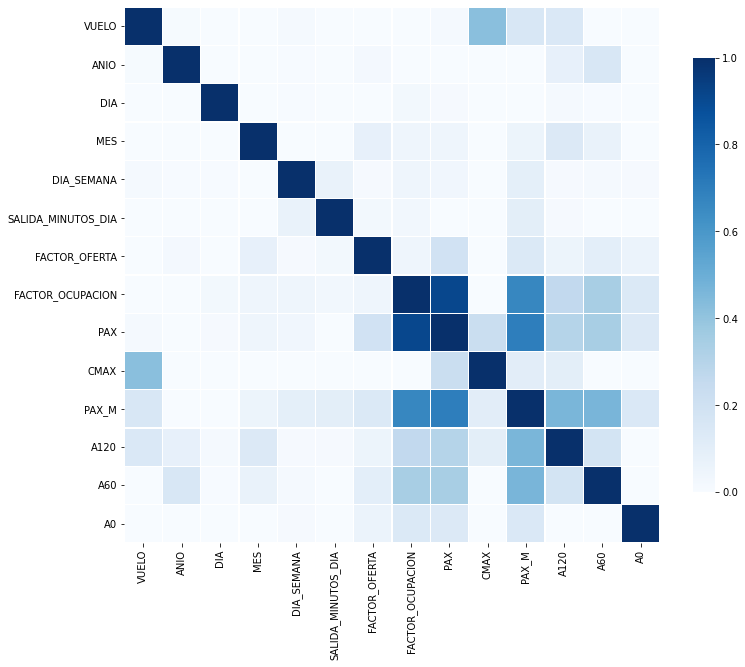

In [63]:
heatmap = data_model[['VUELO','ANIO','DIA','MES','DIA_SEMANA','SALIDA_MINUTOS_DIA',
            'FACTOR_OFERTA','FACTOR_OCUPACION','PAX','CMAX','PAX_M','A120','A60','A0']].corr()

plt.figure(figsize=(12, 10))
g = sns.heatmap(heatmap, cmap="Blues", vmin= 0, vmax=1, square=True,
           linewidth=0.3, cbar_kws={"shrink": .8})

**Ajustes Finales**

In [64]:
col_del = ['ID_VUELO','DIA','ANIO','CIA','FECHA_SALIDA_PROG','PAX_V']
col_res = ['PAX_M','A180','A120','A60','A0']
colname_predict = 'PAX_M'

In [65]:
# Utilizamos un día (31/07/2021) para realizar una prueba evaluación del modelo, por ello lo copiamos y borramos
data_evaluate = data_model[(data_model["ANIO"] == 2021) & (data_model["MES"] == 7) & (data_model["DIA"] == 31)]
data_model = data_model.drop(
    data_model[(data_model["ANIO"] == 2021) & (data_model["MES"] == 7) & (data_model["DIA"] == 31)].index)

In [66]:
# Borramos las columnas que no vamos a usar en el modelo
data_model = data_model.drop(columns=col_del)

In [67]:
data_evaluate = data_evaluate.drop(columns=col_del)

In [68]:
data_model.columns.values

array(['VUELO', 'FACTOR_OFERTA', 'SALIDA_MINUTOS_DIA', 'MES',
       'DIA_SEMANA', 'FESTIVO', 'PAX', 'FACTOR_OCUPACION', 'CMAX',
       'PAX_M', 'A180', 'A120', 'A60', 'A0', 'APD_ACE', 'APD_FUE',
       'APD_GMZ', 'APD_LPA', 'APD_SPC', 'APD_TFN', 'APD_TFS', 'APD_VDE',
       'APA_ACE', 'APA_AGA', 'APA_BJL', 'APA_CMN', 'APA_DSS', 'APA_EUN',
       'APA_FNC', 'APA_FUE', 'APA_GMZ', 'APA_LIL', 'APA_LIS', 'APA_LPA',
       'APA_MRS', 'APA_NKC', 'APA_OVD', 'APA_PMI', 'APA_PNA', 'APA_RAK',
       'APA_REU', 'APA_RMU', 'APA_SDR', 'APA_SID', 'APA_SPC', 'APA_TFN',
       'APA_TFS', 'APA_TLS', 'APA_TRN', 'APA_VCE', 'APA_VDE', 'APA_VGO',
       'APA_VIL', 'APA_VIT', 'APA_XRY', 'APA_ZAZ', 'SEGMENTO_Domestico',
       'SEGMENTO_Interinsular', 'SEGMENTO_Internacional',
       'SEGMENTO_Schengen', 'FLOTA_ATR72-600-BINTER CANARIAS-72',
       'FLOTA_ATR72-600-CANARIAS AIRLINE-72',
       'FLOTA_ATR72-BINTER CANARIAS-72', 'FLOTA_ATR72-CANARYFLY-72',
       'FLOTA_CRJ1000-MEDOPS-100',
       'FLOTA_EMBRA

### Importancia de las características

In [69]:
# División de los datos (Split)
X = data_model.drop(columns=col_res,axis=1).values
X_eval = data_evaluate.drop(columns=col_res,axis=1).values
y = data_model[colname_predict]


print(X.shape)
print(y.shape)

print(X)
print(X_eval)

(146483, 111)
(146483,)
[[6.50000000e+02 1.00000000e+00 6.30000000e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.10000000e+02 1.00000000e+00 6.90000000e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.65100000e+03 1.00000000e+00 7.00000000e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.31000000e+02 9.92424242e-01 6.60000000e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.80000000e+02 1.00000000e+00 7.50000000e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.76000000e+02 1.00000000e+00 7.50000000e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[6.04e+02 1.00e+00 4.80e+02 ... 0.00e+00 0.00e+00 0.00e+00]
 [1.07e+02 1.00e+00 4.80e+02 ... 0.00e+00 0.00e+00 0.00e+00]
 [5.04e+02 1.00e+00 4.95e+02 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [5.21e+02 1.00e+00 5.25e+02 ... 0.00e+00 0.00e+00 0.00e+00]
 [6.59e+02 1.00e+00 6.00e+02 ... 0.00e+00 0.00e+00 0.00e+00]
 [1.57e+02 1.00e+00 1.26e+03 ... 0.00e+00 0.00e+00 0.00e+00]]


In [70]:
# Preparamos los datos de muestra
feature_names = [data_model.drop(columns=col_res).columns.values[i] for i in range(X.shape[1])]

#### Linear Regression

In [71]:
lrm = LinearRegression(fit_intercept = True)
lrm.fit(X, y)

LinearRegression()

In [72]:
X_columns = data_model.drop(columns=col_res).columns.values 
X_df = data_model.drop(columns=col_res)

In [73]:
print("y = ",lrm.intercept_," + ",end="")

for i in range(0, len(lrm.coef_)):
    print(lrm.coef_[i],"",X_columns[i]," + ",end="")
print("0")

y =  5.463177306733094  + 0.00031914207685275134  VUELO  + 3.33713573344605  FACTOR_OFERTA  + 0.005405632192528875  SALIDA_MINUTOS_DIA  + 0.07454856802623178  MES  + 0.3600389914561113  DIA_SEMANA  + 2.432616698855748  FESTIVO  + 0.4308307261469708  PAX  + 6.831512706113948  FACTOR_OCUPACION  + -0.010231796629161405  CMAX  + 1.3809438521851112  APD_ACE  + 2.6144848612696903  APD_FUE  + 1.8687914692329923  APD_GMZ  + -6.381938606739304  APD_LPA  + 4.84526042494543  APD_SPC  + -5.7033245143032065  APD_TFN  + -3.1824381207027783  APD_TFS  + 4.558220634111841  APD_VDE  + 0.6332480094773322  APA_ACE  + 3.4013612368445814  APA_AGA  + -2.9772441205396136  APA_BJL  + -3.9668289139870936  APA_CMN  + 3.3433081810839447  APA_DSS  + -0.733216366066638  APA_EUN  + -2.2134144766117907  APA_FNC  + 1.3414536137706317  APA_FUE  + -0.19430629266853056  APA_GMZ  + 10.417510340524725  APA_LIL  + -3.121155100876435  APA_LIS  + -7.561689383991782  APA_LPA  + 1.6361481334615908  APA_MRS  + 4.0276993035430095

In [74]:
features = pd.DataFrame(lrm.coef_,index=X_columns,columns=['Coeficiente'])
#feature.columns = ['Coeficiente']
#feature.index = X_columns
features['Coeficiente'] = features['Coeficiente'].abs()

features

,Coeficiente
VUELO,0.000319
FACTOR_OFERTA,3.337136
SALIDA_MINUTOS_DIA,0.005406
MES,0.074549
DIA_SEMANA,0.360039
...,...
MATR_EC-NHA,0.073634
MATR_EC-NJK,0.417125
MATR_EC-NMF,0.283805
MATR_EC-NNV,0.822281


**Desviaciones estándar**

In [75]:
stdevs = []

for i in X_columns:
    stdev = X_df[i].std()
    print(i,"->",stdev)
    stdevs.append(stdev) 

VUELO -> 1154.410274885292
FACTOR_OFERTA -> 0.07526127074920243
SALIDA_MINUTOS_DIA -> 266.4606302739296
MES -> 3.420665599531834
DIA_SEMANA -> 1.9923585728198558
FESTIVO -> 0.15924632163607266
PAX -> 18.23129277161415
FACTOR_OCUPACION -> 0.23133657616168973
CMAX -> 10.672516111193334
APD_ACE -> 0.32506671480980126
APD_FUE -> 0.3019724444540503
APD_GMZ -> 0.12535095651718475
APD_LPA -> 0.4641270807128909
APD_SPC -> 0.2954388921951304
APD_TFN -> 0.4557568978916689
APD_TFS -> 0.14689220964817687
APD_VDE -> 0.1847635496091894
APA_ACE -> 0.32568006107207403
APA_AGA -> 0.03561135009576127
APA_BJL -> 0.020568934046800675
APA_CMN -> 0.03011871510362909
APA_DSS -> 0.03313462111610594
APA_EUN -> 0.04437393597842035
APA_FNC -> 0.05732766458733535
APA_FUE -> 0.3021525461960348
APA_GMZ -> 0.12569315143952126
APA_LIL -> 0.016930517957207628
APA_LIS -> 0.036833179408450045
APA_LPA -> 0.45366854132890067
APA_MRS -> 0.011972542410257263
APA_NKC -> 0.04201201081616043
APA_OVD -> 0.03112013254059305
APA_

In [76]:
features['STD'] =np.array(stdevs).reshape(-1,1)
features['Importancia'] = features['STD']*features['Coeficiente']
features['Importancia_Normalizada'] = 100*features['Importancia'] / features['Importancia'].max()

features

,Coeficiente,STD,Importancia,Importancia_Normalizada
VUELO,0.000319,1154.410275,0.368421,4.690511
FACTOR_OFERTA,3.337136,0.075261,0.251157,3.197579
SALIDA_MINUTOS_DIA,0.005406,266.460630,1.440388,18.338145
MES,0.074549,3.420666,0.255006,3.246578
DIA_SEMANA,0.360039,1.992359,0.717327,9.132568
...,...,...,...,...
MATR_EC-NHA,0.073634,0.072545,0.005342,0.068008
MATR_EC-NJK,0.417125,0.136449,0.056916,0.724623
MATR_EC-NMF,0.283805,0.123678,0.035100,0.446878
MATR_EC-NNV,0.822281,0.038194,0.031406,0.399847


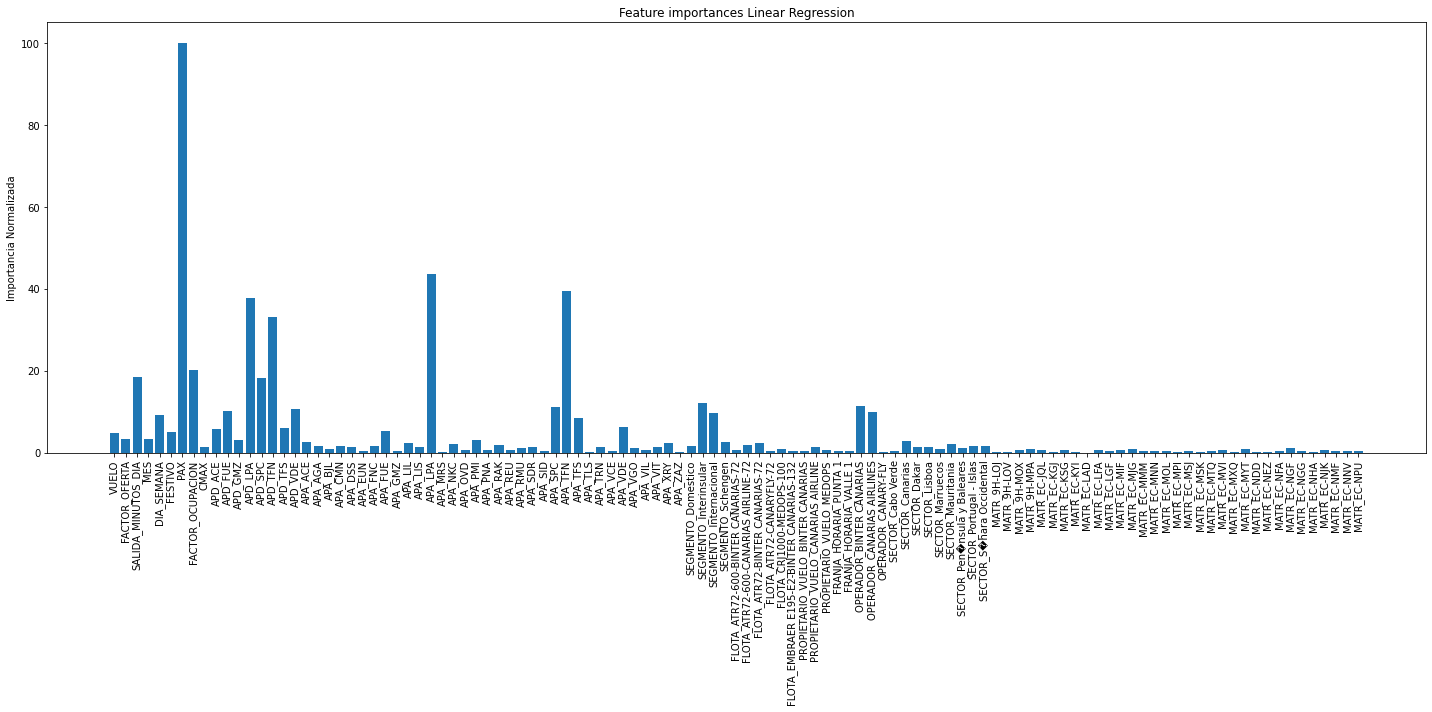

In [77]:
# Visualizamos en gráfico

fig, ax = plt.subplots(figsize=(20,10))
plt.bar(features.index, features['Importancia_Normalizada'])
ax.set_title("Feature importances Linear Regression")
ax.set_ylabel("Importancia Normalizada")
plt.xticks(rotation=90)
fig.tight_layout()

#### Random Forest

In [78]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X, y)

RandomForestClassifier(random_state=0)

In [79]:
for i, column in enumerate(data_model.drop(columns=col_res,axis=1)):
    print('La importancia para {} es: {:.3f}'.format(column, rfc.feature_importances_[i]))

La importancia para VUELO es: 0.082
La importancia para FACTOR_OFERTA es: 0.010
La importancia para SALIDA_MINUTOS_DIA es: 0.087
La importancia para MES es: 0.121
La importancia para DIA_SEMANA es: 0.088
La importancia para FESTIVO es: 0.007
La importancia para PAX es: 0.121
La importancia para FACTOR_OCUPACION es: 0.119
La importancia para CMAX es: 0.001
La importancia para APD_ACE es: 0.005
La importancia para APD_FUE es: 0.005
La importancia para APD_GMZ es: 0.001
La importancia para APD_LPA es: 0.006
La importancia para APD_SPC es: 0.004
La importancia para APD_TFN es: 0.007
La importancia para APD_TFS es: 0.001
La importancia para APD_VDE es: 0.002
La importancia para APA_ACE es: 0.006
La importancia para APA_AGA es: 0.000
La importancia para APA_BJL es: 0.000
La importancia para APA_CMN es: 0.000
La importancia para APA_DSS es: 0.000
La importancia para APA_EUN es: 0.000
La importancia para APA_FNC es: 0.000
La importancia para APA_FUE es: 0.005
La importancia para APA_GMZ es: 0.

In [80]:
start_time = time.time()
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Tiempo de cómputo: {elapsed_time:.3f} seconds")

Tiempo de cómputo: 0.348 seconds


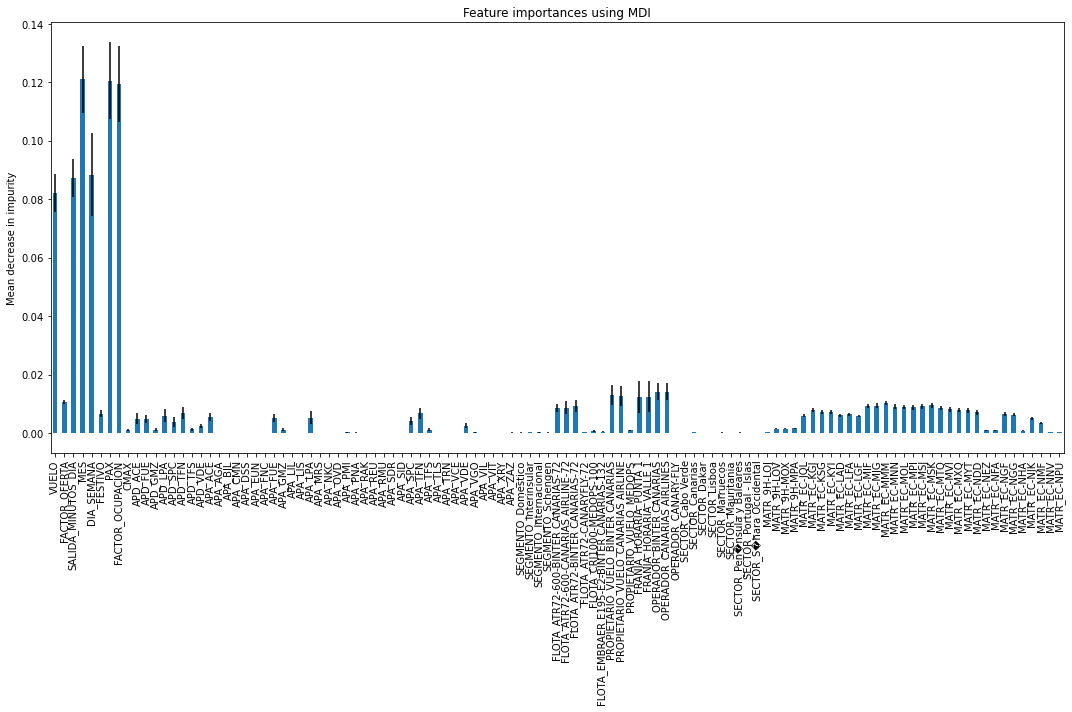

In [81]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(15,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Data Splitting - Validación Hold-out

In [82]:
# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(117186, 111)
(29297, 111)
(117186,)
(29297,)


## Linear Regression

In [83]:
# Training the Regression
lrm = LinearRegression(fit_intercept = True)
lrm.fit(X_train, y_train)

y_pred = lrm.predict(X_train)

### Evaluación del Modelo

In [84]:
# Model Accuracy on training dataset
print('Accuracy (Training): ', lrm.score(X_train, y_train) )
print('Accuracy r2 (Training): ',r2_score(y_train,y_pred) )   
print("")
# Model Accuracy on testing dataset
print('Accuracy (Testing): ', lrm.score(X_test, y_test) )
print("")
# The Root Mean Squared Error (RMSE)
print('RMSE (Training): ',sqrt(mean_squared_error(y_train,y_pred)))
print('RMSE (Testing): ',sqrt(mean_squared_error(y_test,lrm.predict(X_test))))
print("")
# The Mean Absolute Error (MAE)
print('MAE (Training): ',mean_absolute_error(y_train,y_pred))
print('MAE (Testing): ',mean_absolute_error(y_test,lrm.predict(X_test)))

Accuracy (Training):  0.6255899026748347
Accuracy r2 (Training):  0.6255899026748347

Accuracy (Testing):  0.6250151756470625

RMSE (Training):  8.05763663820057
RMSE (Testing):  8.024165718004438

MAE (Training):  6.172612388239599
MAE (Testing):  6.16292962362691


Text(0.5, 1.0, 'Actuals Vs Predicted Values')

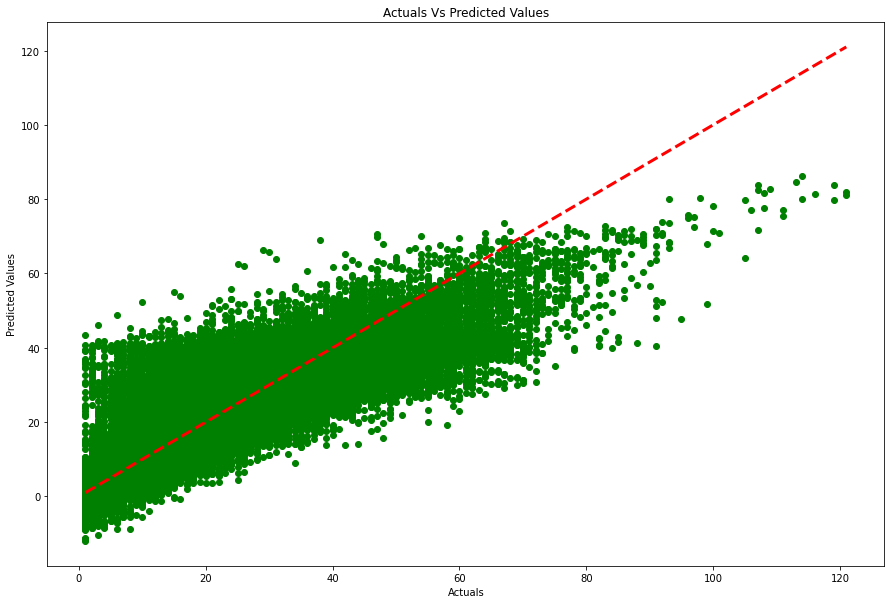

In [85]:
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actuals Vs Residuals')

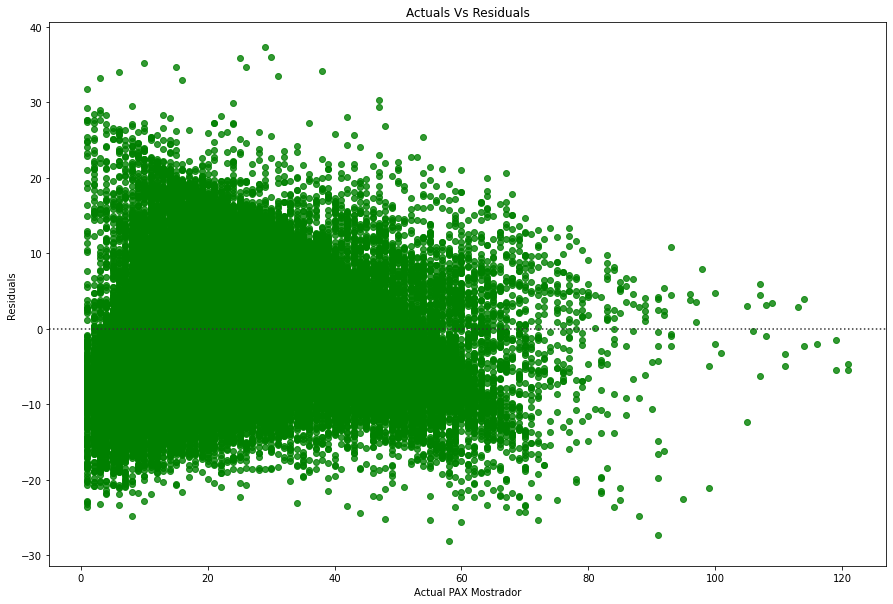

In [86]:
plt.figure(figsize=(15,10))
sns.residplot(y_train, y_pred, color='green')
plt.xlabel('Actual PAX Mostrador')
plt.ylabel('Residuals')
plt.title('Actuals Vs Residuals')

### Predicción Linear Regression Model

In [87]:
y_evaluate_pred = lrm.predict(X_eval)

In [88]:
data_evaluate[colname_predict+'_PREDICT_LR'] = pd.DataFrame(y_evaluate_pred, columns = [colname_predict+'_PREDICT_LR']).values

## Random Forest Regression

In [89]:
rfm = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfm.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [90]:
# Model Accuracy on training dataset
print('Accuracy (Training): ', rfm.score(X_train, y_train) )
print('Accuracy r2 (Training): ',r2_score(y_train,y_pred) )   
print("")
# Model Accuracy on testing dataset
print('Accuracy (Testing): ', rfm.score(X_test, y_test) )
print("")
# The Root Mean Squared Error (RMSE)
print('RMSE (Training): ',sqrt(mean_squared_error(y_train,y_pred)))
print('RMSE (Testing): ',sqrt(mean_squared_error(y_test,rfm.predict(X_test))))
print("")
# The Mean Absolute Error (MAE)
print('MAE (Training): ',mean_absolute_error(y_train,y_pred))
print('MAE (Testing): ',mean_absolute_error(y_test,rfm.predict(X_test)))

y_predict_rfr = rfm.predict((X_test))

r_square = metrics.r2_score(y_test, y_predict_rfr)
print("")
print("")
print('R-Squared Error: ',r_square)

Accuracy (Training):  0.941605250608493
Accuracy r2 (Training):  0.6255899026748347

Accuracy (Testing):  0.6855097360196567

RMSE (Training):  8.05763663820057
RMSE (Testing):  7.348465266340867

MAE (Training):  6.172612388239599
MAE (Testing):  5.486961513747277


R-Squared Error:  0.6855097360196567


### Make a Prediction with Random Forest Regression model

In [91]:
y_eval_RF = rfm.predict(X_eval)

In [92]:
data_evaluate[colname_predict+'_PREDICT_RF'] = pd.DataFrame(y_eval_RF, columns = [colname_predict+'_PREDICT_RF']).values

## XGBoost Regression

In [93]:
# check xgboost version
import xgboost
import xgboost as xgb
print(xgboost.__version__)

1.5.0


In [94]:
xgb_r = xgb.XGBRegressor(
    n_estimators=1000, 
    max_depth=10, 
    eta=0.01, 
    subsample=1.0, 
    colsample_bytree=1.0)
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, enable_categorical=False,
             eta=0.01, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.00999999978,
             max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1.0,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
# Model Accuracy on training dataset
print('Accuracy (Training): ', xgb_r.score(X_train, y_train) )
print('Accuracy r2 (Training): ',r2_score(y_train,y_pred) )   
print("")
# Model Accuracy on testing dataset
print('Accuracy (Testing): ', xgb_r.score(X_test, y_test) )
print("")
# The Root Mean Squared Error (RMSE)
print('RMSE (Training): ',sqrt(mean_squared_error(y_train,y_pred)))
print('RMSE (Testing): ',sqrt(mean_squared_error(y_test,xgb_r.predict(X_test))))
print("")
# The Mean Absolute Error (MAE)
print('MAE (Training): ',mean_absolute_error(y_train,y_pred))
print('MAE (Testing): ',mean_absolute_error(y_test,xgb_r.predict(X_test)))

Accuracy (Training):  0.7938641922403895
Accuracy r2 (Training):  0.6255899026748347

Accuracy (Testing):  0.7306703415102

RMSE (Training):  8.05763663820057
RMSE (Testing):  6.800410565428265

MAE (Training):  6.172612388239599
MAE (Testing):  5.07111146009208


In [96]:
y_eval_XGB = xgb_r.predict(X_eval).flatten()

In [97]:
data_evaluate[colname_predict+'_PREDICT_XGB'] = pd.DataFrame(y_eval_XGB, columns = [colname_predict+'_PREDICT_XGB']).values

## Deep Learning Regression Model

In [98]:
# Normalizamos los datos
from sklearn.preprocessing import StandardScaler

ss =StandardScaler()
X = ss.fit_transform(X)
X_eval = ss.fit_transform(X_eval)

print(X.shape)
print(y.shape)

print(X)
print(X_eval)

(146483, 111)
(146483,)
[[ 1.73806878e-03  1.51550325e-01 -8.15575230e-01 ... -1.25629884e-01
  -3.82499384e-02 -3.80705206e-02]
 [-4.66034832e-01  1.51550325e-01 -5.90400484e-01 ... -1.25629884e-01
  -3.82499384e-02 -3.80705206e-02]
 [ 5.20008099e+00  1.51550325e-01 -5.52871360e-01 ... -1.25629884e-01
  -3.82499384e-02 -3.80705206e-02]
 ...
 [-4.47843664e-01  5.08905382e-02 -7.02987857e-01 ... -1.25629884e-01
  -3.82499384e-02 -3.80705206e-02]
 [-3.18772993e-01  1.51550325e-01 -3.65225738e-01 ... -1.25629884e-01
  -3.82499384e-02 -3.80705206e-02]
 [-4.08862589e-01  1.51550325e-01 -3.65225738e-01 ... -1.25629884e-01
  -3.82499384e-02 -3.80705206e-02]]
[[-0.11215785  0.10482848 -1.408135   ...  0.         -0.07392213
  -0.12874232]
 [-0.44831895  0.10482848 -1.408135   ...  0.         -0.07392213
  -0.12874232]
 [-0.1797959   0.10482848 -1.35097288 ...  0.         -0.07392213
  -0.12874232]
 ...
 [-0.16829743  0.10482848 -1.23664863 ...  0.         -0.07392213
  -0.12874232]
 [-0.074956

In [99]:
print(X.shape)
print(y.shape)

(146483, 111)
(146483,)


In [100]:
def wider_model(n_features):
    model = keras.Sequential([
        layers.Dense(20,input_dim=n_features),
        layers.Dense(1)
    ])
    
    model.compile(loss='mse', metrics=['mae', 'mse'])
    
    return model

In [101]:
model = wider_model(X.shape[1])

In [102]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                2240      
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,261
Trainable params: 2,261
Non-trainable params: 0
_________________________________________________________________


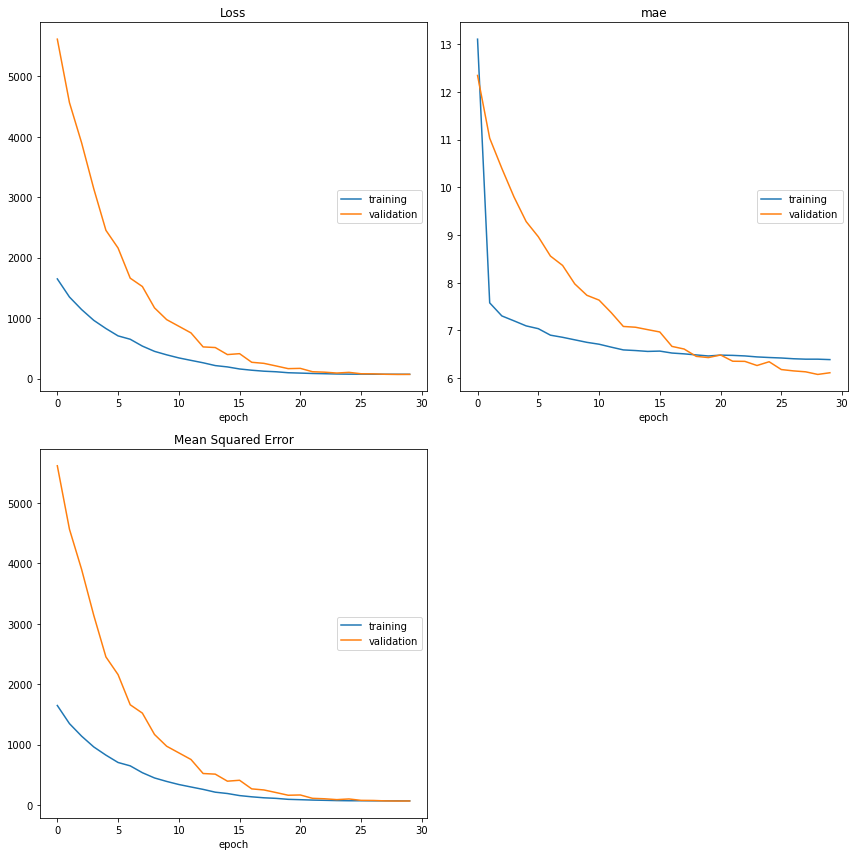

Loss
	training         	 (min:   69.879, max: 1648.133, cur:   69.879)
	validation       	 (min:   67.537, max: 5614.229, cur:   68.454)
mae
	training         	 (min:    6.387, max:   13.109, cur:    6.387)
	validation       	 (min:    6.076, max:   12.347, cur:    6.111)
Mean Squared Error
	training         	 (min:   69.879, max: 1648.133, cur:   69.879)
	validation       	 (min:   67.537, max: 5614.229, cur:   68.454)


In [103]:
from livelossplot import PlotLossesKeras
history = model.fit(
  X, y,
  epochs=30, validation_split = 0.3, verbose=0,
  callbacks=[PlotLossesKeras()])

In [104]:
y_eval_NN = model.predict(X_eval).flatten()

In [105]:
data_evaluate[colname_predict+'_PREDICT_NN'] = pd.DataFrame(y_eval_NN, columns = [colname_predict+'_PREDICT_NN']).values

## Resultados

In [106]:
# Exportamos a Excel
data_evaluate.to_excel ('TFM_FileOUT_export_predict.xlsx', index = False, header=True)